# meloian_lab6

### Завдання 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# step 1: generate two-dimensional data
np.random.seed(0) 
k_real = 2 
b_real = 1 
x = np.random.rand(10000) * 10  
y = k_real * x + b_real + np.random.randn(10000) * 2 

In [3]:
# step 2: least squares method (LSM)
def least_squares(x, y):
    mean_x, mean_y = np.mean(x), np.mean(y)
    b1 = np.sum((x - mean_x) * (y - mean_y)) / np.sum((x - mean_x)**2)
    b0 = mean_y - b1 * mean_x
    return b1, b0

k_estimated, b_estimated = least_squares(x, y)

In [4]:
# step 3: comparison with np.polyfit
k_polyfit, b_polyfit = np.polyfit(x, y, 1)

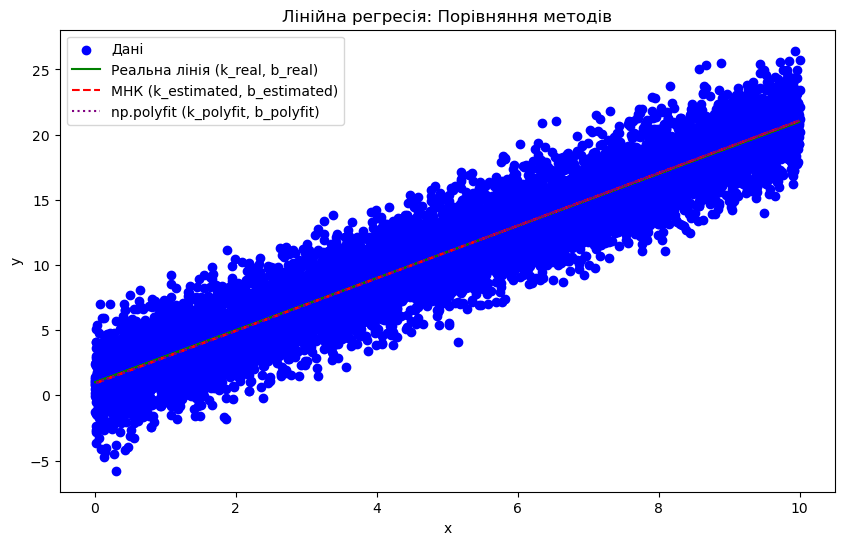

((2, 1),
 (2.016543933362425, 0.9164861314459429),
 (2.0165439333624238, 0.9164861314459454))

In [5]:
# visualization on a graph
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue', label='Дані')
plt.plot(x, k_real * x + b_real, color='green', label='Реальна лінія (k_real, b_real)')
plt.plot(x, k_estimated * x + b_estimated, color='red', linestyle='--', label='МНК (k_estimated, b_estimated)')
plt.plot(x, k_polyfit * x + b_polyfit, color='purple', linestyle=':', label='np.polyfit (k_polyfit, b_polyfit)')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Лінійна регресія: Порівняння методів')
plt.legend()
plt.show()

(k_real, b_real), (k_estimated, b_estimated), (k_polyfit, b_polyfit)

### Завдання 2

In [6]:
def gradient_descent(x, y, learning_rate=0.01, n_iter=1000):
    m = len(y) 
    k = b = 0 
    history = [] 

    for _ in range(n_iter):
        y_pred = k * x + b 
        error = y - y_pred 
        cost = (1/m) * np.sum(error**2) 
        history.append(cost) 

     
        dk = -(2/m) * np.sum(x * error)
        db = -(2/m) * np.sum(error)
        k -= learning_rate * dk
        b -= learning_rate * db

    return k, b, history

In [7]:
# apply the gradient descent method
learning_rate = 0.001
n_iter = 1000
k_gd, b_gd, cost_history = gradient_descent(x, y, learning_rate, n_iter)

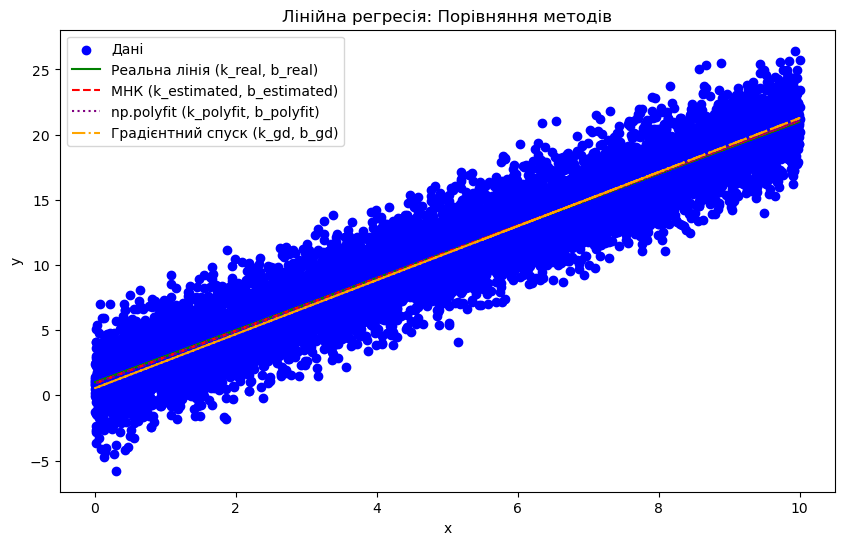

In [8]:
# visualize the results on a graph
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue', label='Дані')
plt.plot(x, k_real * x + b_real, color='green', label='Реальна лінія (k_real, b_real)')
plt.plot(x, k_estimated * x + b_estimated, color='red', linestyle='--', label='МНК (k_estimated, b_estimated)')
plt.plot(x, k_polyfit * x + b_polyfit, color='purple', linestyle=':', label='np.polyfit (k_polyfit, b_polyfit)')
plt.plot(x, k_gd * x + b_gd, color='orange', linestyle='-.', label='Градієнтний спуск (k_gd, b_gd)')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Лінійна регресія: Порівняння методів')
plt.legend()
plt.show()

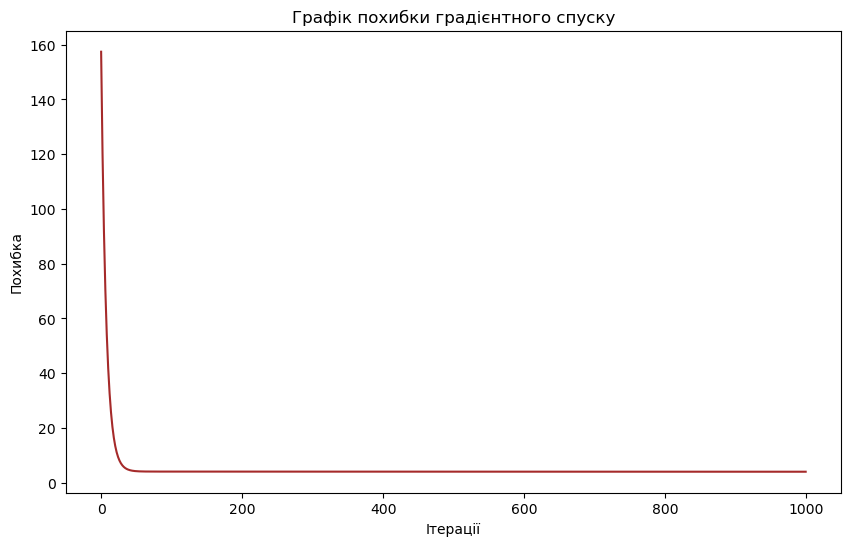

(2.071603337062341, 0.5528840916738476)

In [9]:
# graph of error versus number of iterations
plt.figure(figsize=(10, 6))
plt.plot(range(n_iter), cost_history, color='brown')
plt.xlabel('Ітерації')
plt.ylabel('Похибка')
plt.title('Графік похибки градієнтного спуску')
plt.show()

(k_gd, b_gd)